In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
import scipy.optimize as spop

from datetime import datetime
import os
import csv

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [81]:
directories = ["Binance_Historical_1m_FUTURES_9_days_2022-06-06T13:56:51", "Binance_Historical_1m_SPOT_9_days_2022-06-06T14:02:09"]

In [203]:
# MERGING INTERSECTION
# spot = []
# margin = []
# with os.scandir('raw_data/%s' % directories[0]) as entries:
#   for entry in entries:
#     entry_arr = entry.name.split("_")
#     # instrument = "_".join(entry_arr[0:2])
#     margin.append(entry_arr[0])
        
# with os.scandir('raw_data/%s' % directories[1]) as entries:
#     for entry in entries:
#       entry_arr = entry.name.split("_")
#       # instrument = "_".join(entry_arr[0:2])
#       spot.append(entry_arr[0])

# intersection = set(spot).intersection(margin)

# df_closings = pd.DataFrame()
# with os.scandir('raw_data/%s' % "Binance_Historical_1h_FUTURES_90_days_2022-06-15T21:21:15") as entries:
#     for idx, entry in enumerate(entries):
#         # if entry.name.split("_")[0] in intersection:
#       instrument = "_".join(entry.name.split("_")[0:2])
#       df = pd.read_csv('raw_data/%s/%s' % ("Binance_Historical_1h_FUTURES_90_days_2022-06-15T21:21:15", entry.name), index_col="Date")
#       df = df[["Close"]].copy()
#       df.columns = [instrument]
#       df_closings = pd.concat([df_closings, df], axis=1)
        
# with os.scandir('raw_data/%s' % directories[1]) as entries:
#     for idx, entry in enumerate(entries):
#         if entry.name.split("_")[0] in intersection:
#             instrument = "_".join(entry.name.split("_")[0:2])
#             df = pd.read_csv('raw_data/%s/%s' % (directories[1], entry.name), index_col="Date")
#             df = df[["Close"]].copy()
#             df.columns = [instrument]
#             df_closings = pd.concat([df_closings, df], axis=1)
        
# df_closings.index = pd.to_datetime(df_closings.index)


# df_closings.fillna(method="ffill", inplace=True)
# df_closings.fillna(value=0, inplace=True)   

df_closings = pd.DataFrame()
with os.scandir('raw_data/%s' % "Binance_Historical_1h_FUTURES_730_days_2022-06-16T08:05:42") as entries:
    for idx, entry in enumerate(entries):
      instrument = "_".join(entry.name.split("_")[0:2])
      df = pd.read_csv('raw_data/%s/%s' % ("Binance_Historical_1h_FUTURES_730_days_2022-06-16T08:05:42", entry.name), parse_dates=["Date"], index_col="Date" )
      
      df = df[["Close"]].copy()
      df.columns = [instrument]
      df_closings = pd.concat([df_closings, df], axis=1) 
      
# df_closings.fillna(method="ffill", inplace=True)
# df_closings.fillna(value=0, inplace=True)


# df_closings = df_closings.loc["2021-06-01 00:00:00":"2022-06-01 00:00:00"].copy()

# df_closings.dropna(inplace=True)   



<h3>Outliers removal</h3>
<span>*due to the low observation amount</span>

In [233]:
# OBSERVATION COUNT DF
df_observation_num = pd.DataFrame(columns=["observations"])
for column in df_closings.columns:
  df_observation_num.loc[column] = len(df_closings[column].dropna())

In [235]:
# DISPLAYING OBS COUNT VALUES ASCENDING
df_observation_num.sort_values(by="observations").head(15)

,observations
BTCUSDT_220624,2070
ETHUSDT_220624,2070
APEUSDT_FUTURES,2178
GMTUSDT_FUTURES,2237
API3USDT_FUTURES,2742
IMXUSDT_FUTURES,3006
FLOWUSDT_FUTURES,3030
DUSKUSDT_FUTURES,3846
ROSEUSDT_FUTURES,4014
ANTUSDT_FUTURES,4109


In [236]:
drop_columns = []
for idx, row in df_observation_num.iterrows():
  if row.observations < 2070: # arbitrarily selected value based on bottom values from df_observation_num
    drop_columns.append(row.name)
    
# removing outliers from the original DF
df_closings.drop(columns=drop_columns, inplace=True)

# cleaning DF
df_closings.dropna(inplace=True)
df_closings.shape

(2070, 146)

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# def cointegrated_pairs(data):
#     n =  (len(data.columns) -1)
#     stocks = data.iloc[:,1:].columns.values #pulls all stock names 
#     data = data.to_numpy()
#     pvalue_matrix = np.zeros((n,n),dtype = float)
#     pairs = np.empty((n*n,3),dtype=object)
#     m = 0
#     # loop through all possilbe combintions of stocks ie 3!=6
#     for i in range(0,n):
#         for j in range(0,n):
#             S1 = data[:,i+1]
#             S2 = data[:,j+1]
#             result = ts.coint(S1,S2)
#             pvalue_matrix[i,j] = result[1]
#             #storing all paris in matrix form
#             if (result[1] < 0.05) & (i!=j):
#                 pairs[m,0] = stocks[i]
#                 pairs[m,1] = stocks[j] 
#                 pairs[m,2] = result[1]
#                 m = m + 1
#     try:
#         a_file = open("pairs_temp_%s.txt" % str(datetime.utcnow().replace(microsecond=0).isoformat()), "w")
#         for row in pairs:
#             if row[0] is not None:
#                 a_file.write("%s/%s: %s\n" % (row[0], row[1], row[2]))
#         a_file.close()
#     except:
#        print("Couldn't save pairs to txt file") 
       
#     return pvalue_matrix,  pairs

In [ ]:
# on the MBP M1 it is ~ 37s per 100 items (10x10 np array)
# checking 1600 instruments would take ofer 263h (~ 11 days)
# pvalue_matrix,  pairs = cointegrated_pairs(df_closings)

<h1>Correlation</h1>

In [317]:
matrix = df_closings.pct_change().corr(method ='pearson')
matrix.to_excel("processed_data/corr_matrix_temp_%s.xlsx" % str(datetime.utcnow().replace(microsecond=0).isoformat()))

In [318]:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    au_corr.dropna(inplace=True)
    
    indexes = []
    values = []
    for idx in au_corr.index:
        indexes.append("%s-%s" % (idx[0], idx[1]))
        values.append(au_corr[idx])
    corr_pairs_df = pd.DataFrame(index=indexes, data=values)
    
    try:
        txt_file = open("processed_data/corr_pairs_temp_%s.txt" % str(datetime.utcnow().replace(microsecond=0).isoformat()), "w")
        for idx, row in enumerate(au_corr):
            if row is not None:
                txt_file.write("%s/%s: %s\n" % (au_corr.index[idx][0], au_corr.index[idx][1], row))
        txt_file.close()
        
        corr_pairs_df.to_csv("processed_data/corr_pairs__tem%s.csv" % str(datetime.utcnow().replace(microsecond=0).isoformat()))
        
    except:
       print("Couldn't save pairs to temp files") 
    return corr_pairs_df.iloc[0:n]

print("Top Absolute Correlations")
# print(get_top_abs_correlations(matrix, 50))

corr_pairs = get_top_abs_correlations(matrix, -1)

Top Absolute Correlations


In [297]:
corr_pairs

,0
ETHUSDT_220624-ETHUSDT_FUTURES,0.999987
BTCUSDT_220624-BTCUSDT_FUTURES,0.999966
SOLBUSD_FUTURES-SOLUSDT_FUTURES,0.999961
ADABUSD_FUTURES-ADAUSDT_FUTURES,0.999952
DOGEUSDT_FUTURES-DOGEBUSD_FUTURES,0.999935
...,...
BTCDOMUSDT_FUTURES-IOTAUSDT_FUTURES,-0.962739
BTCDOMUSDT_FUTURES-LINKUSDT_FUTURES,-0.963688
UNIUSDT_FUTURES-BTCDOMUSDT_FUTURES,-0.965235
BTCDOMUSDT_FUTURES-MATICUSDT_FUTURES,-0.965397


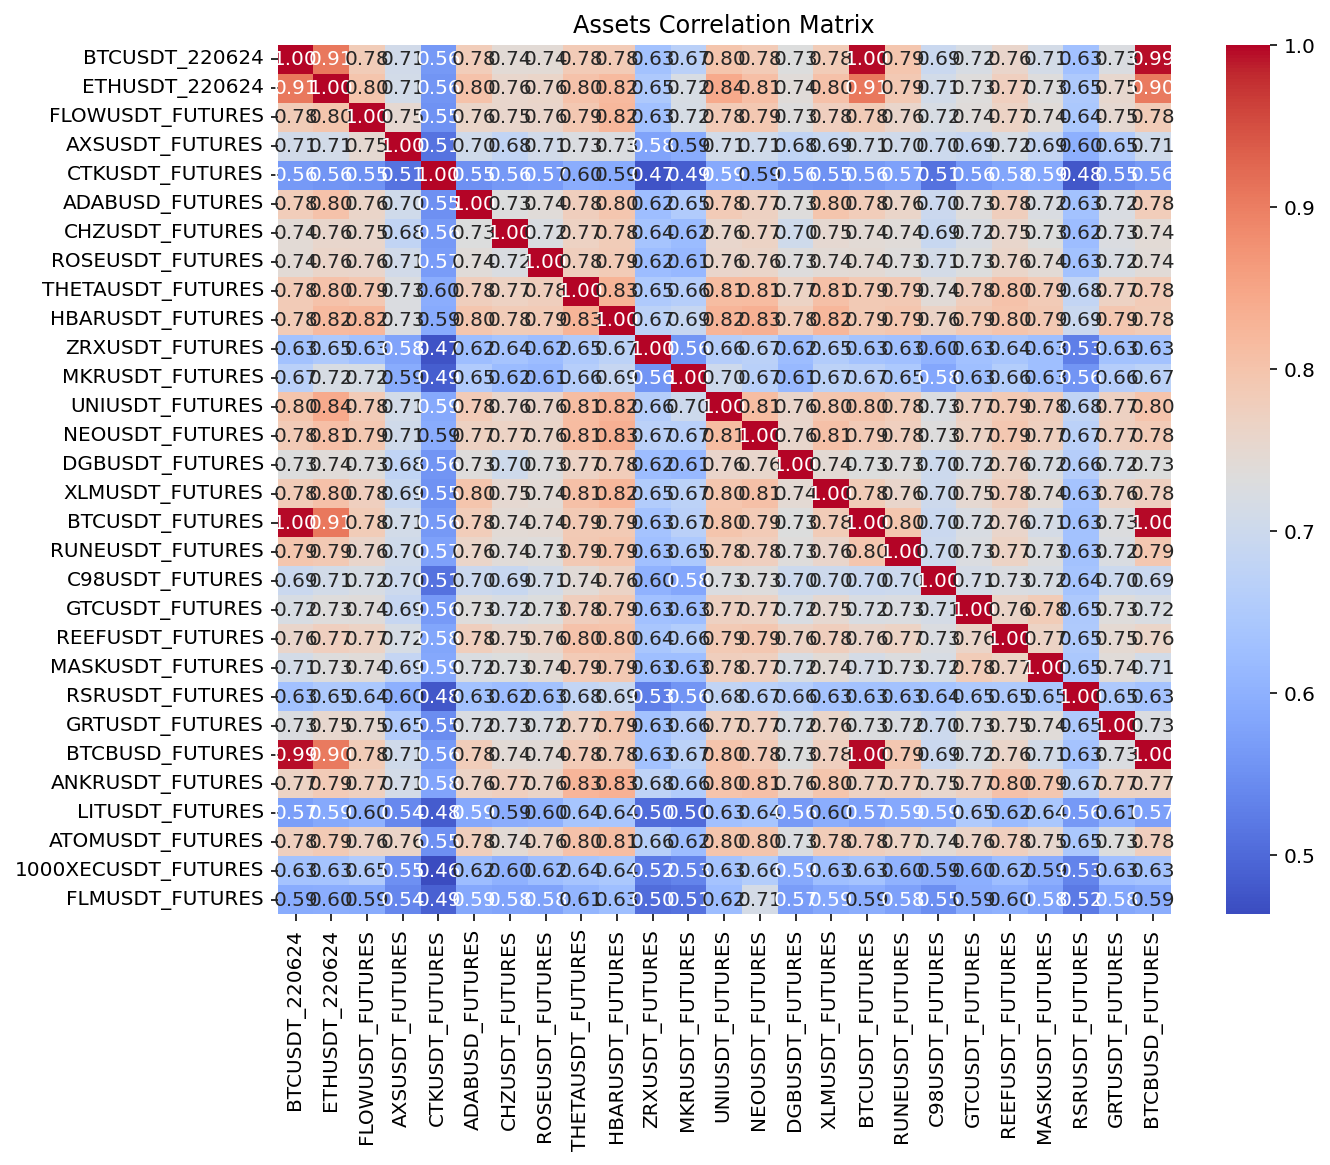

In [241]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix.iloc[:30, :25], ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.savefig('images/chart1', dpi=300, facecolor="#ffffff", pad_inches=2)

<h1>Cointegration</h1>

In [320]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            print("Performing coint test %s %s %s" % (j, i, n))
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j], result[1]))
    try:
        txt_file = open("processed_data/coint_pairs_temp_%s.txt" % str(datetime.utcnow().replace(microsecond=0).isoformat()), "w")
        for row in pairs:
            if row[0] is not None:
                txt_file.write("%s/%s: %s\n" % (row[0], row[1], row[2]))
        txt_file.close()
        
        indexes = []
        values = []
        for row in pairs:
            indexes.append("%s-%s" % (row[0], row[1]))
            values.append(row[2])
        coint_pairs_df = pd.DataFrame(index=indexes, data=values)
        coint_pairs_df.to_csv("processed_data/coint_pairs_temp%s.csv" % str(datetime.utcnow().replace(microsecond=0).isoformat()))
        
        pv_val_df = pd.DataFrame(pvalue_matrix)
        pv_val_df.columns = data.columns
        pv_val_df.index = data.columns
        pv_val_df.to_excel("processed_data/coint_matrix_temp_%s.xlsx" % str(datetime.utcnow().replace(microsecond=0).isoformat()))
    except:
       print("Couldn't save pairs to temp files") 
    return pvalue_matrix, coint_pairs_df

In [321]:
import warnings
warnings.filterwarnings('ignore')

In [322]:

pvalue_matrix, coint_pairs = find_cointegrated_pairs(df_closings)

In [323]:
coint_pairs

,0
BTCUSDT_220624-IOSTUSDT_FUTURES,0.033397
BTCUSDT_220624-STMXUSDT_FUTURES,0.016758
BTCUSDT_220624-LRCUSDT_FUTURES,0.001868
BTCUSDT_220624-STORJUSDT_FUTURES,0.045765
FLOWUSDT_FUTURES-CTKUSDT_FUTURES,0.014204
...,...
API3USDT_FUTURES-DENTUSDT_FUTURES,0.010112
API3USDT_FUTURES-QTUMUSDT_FUTURES,0.012625
API3USDT_FUTURES-KSMUSDT_FUTURES,0.037737
API3USDT_FUTURES-TLMUSDT_FUTURES,0.007516


<h2>CORR VS. COINT pairs</h2>

In [324]:
df_hi_corr = corr_pairs.loc[corr_pairs[0]>0.92]
df_hi_corr

,0
ETHUSDT_220624-ETHUSDT_FUTURES,0.999987
BTCUSDT_220624-BTCUSDT_FUTURES,0.999966
SOLBUSD_FUTURES-SOLUSDT_FUTURES,0.999961
ADABUSD_FUTURES-ADAUSDT_FUTURES,0.999952
DOGEUSDT_FUTURES-DOGEBUSD_FUTURES,0.999935
...,...
XMRUSDT_FUTURES-DENTUSDT_FUTURES,0.920048
ZRXUSDT_FUTURES-MASKUSDT_FUTURES,0.920042
ETHUSDT_220624-CELRUSDT_FUTURES,0.920037
ETHBUSD_FUTURES-MANAUSDT_FUTURES,0.920036


In [325]:
df_corr_coint_pairs = pd.DataFrame(columns=["corr", "coint"])
for idx in df_hi_corr.index:
  if idx in coint_pairs.index:
    df_corr_coint_pairs.loc[idx] = [df_hi_corr.loc[idx][0], coint_pairs.loc[idx][0]]
df_corr_coint_pairs

,corr,coint
SOLBUSD_FUTURES-SOLUSDT_FUTURES,0.999961,5.656579e-07
ADABUSD_FUTURES-ADAUSDT_FUTURES,0.999952,1.219130e-07
DOGEUSDT_FUTURES-DOGEBUSD_FUTURES,0.999935,3.698161e-08
ETHUSDT_FUTURES-ETHBUSD_FUTURES,0.999908,5.806439e-09
BNBBUSD_FUTURES-BNBUSDT_FUTURES,0.999903,1.455702e-11
...,...,...
DUSKUSDT_FUTURES-SCUSDT_FUTURES,0.920594,3.357096e-02
XEMUSDT_FUTURES-ICPUSDT_FUTURES,0.920469,4.166683e-02
ZRXUSDT_FUTURES-CRVUSDT_FUTURES,0.920394,1.550016e-02
HOTUSDT_FUTURES-IOSTUSDT_FUTURES,0.920188,5.135912e-03


In [326]:
df_corr_coint_pairs.to_csv("processed_data/corr_coint_pairs_temp_%s.csv" % str(datetime.utcnow().replace(microsecond=0).isoformat()))

<h1>Dickey-Fuller & KPSS</h1>